<a href="https://colab.research.google.com/github/koushik2299/Phising-attack-detection/blob/main/Phising_attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup and Libraries**


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/content/Phishing_Legitimate_full.csv")
odf = df

In [3]:
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


# **Cleaning**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [5]:
df.shape

(10000, 50)

The data set has 50 Columns and 10,000 Observations of phising which is a descent dataset

In [6]:
columns = df.columns
print(columns)

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

As our columns are all type of **64** if we could convert to **32** we can save 50% of memory usage so lets convert this into **Type 32**

In [7]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype('float32')
    elif df[col].dtype == 'int64':
        df[col] = df[col].astype('int32')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

Hence we can see that the memory usage has been cutdown from 3.8mb to 1.9mb because of this.

## **Handling Missing Values**


In [9]:
df.isna().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


There are no missing values in the dataset

## **Duplicate Values**

In [12]:
df.duplicated().sum()

0

Number of Duplicate Values in the Dataset are 0

## Unique Values in the Dataset

In [13]:
for col in df.columns:
    unique_values = df[col].explode().unique()
    if len(unique_values) > 10:
        print(f"{col} has {len(unique_values)} unique values")
    else:
        print(f"{col} contains: {', '.join(map(str, unique_values))}")


id has 10000 unique values
NumDots has 17 unique values
SubdomainLevel has 13 unique values
PathLevel has 18 unique values
UrlLength has 226 unique values
NumDash has 25 unique values
NumDashInHostname contains: 0, 1, 2, 4, 3, 5, 7, 6, 9, 8
AtSymbol contains: 0, 1
TildeSymbol contains: 0, 1
NumUnderscore has 16 unique values
NumPercent has 14 unique values
NumQueryComponents has 19 unique values
NumAmpersand has 16 unique values
NumHash contains: 0, 1
NumNumericChars has 82 unique values
NoHttps contains: 1, 0
RandomString contains: 0, 1
IpAddress contains: 0, 1
DomainInSubdomains contains: 0, 1
DomainInPaths contains: 0, 1
HttpsInHostname contains: 0
HostnameLength has 74 unique values
PathLength has 147 unique values
QueryLength has 164 unique values
DoubleSlashInPath contains: 0, 1
NumSensitiveWords contains: 0, 1, 2, 3
EmbeddedBrandName contains: 0, 1
PctExtHyperlinks has 2510 unique values
PctExtResourceUrls has 1489 unique values
ExtFavicon contains: 1, 0
InsecureForms contains: 


The explode() function is a method provided by pandas, a popular data manipulation library in Python. It is used to transform elements of a list-like object within a pandas Series into separate rows, effectively "exploding" the list-like object.

The functionality of explode() is particularly useful when dealing with columns containing lists, arrays, or other iterable objects. When you apply explode() to such a column, it will create a new row for each element in the list, while duplicating the rest of the data in the other columns. This makes it easier to perform operations on individual elements within the list-like objects.

# **EDA**

Our Target variable is Class Label Lets See the distribution of the column

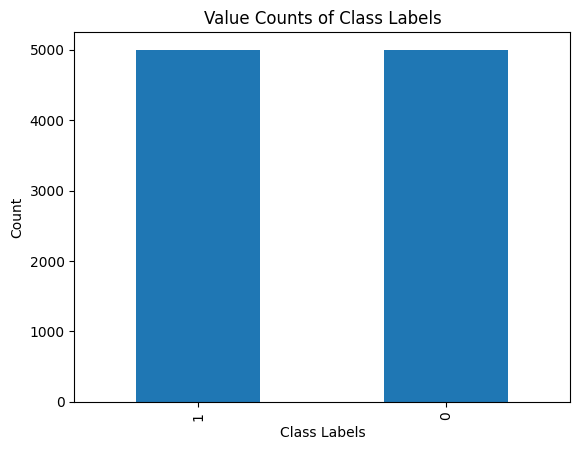

In [25]:
df['CLASS_LABEL'].value_counts().plot(kind='bar')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Value Counts of Class Labels')
plt.show()

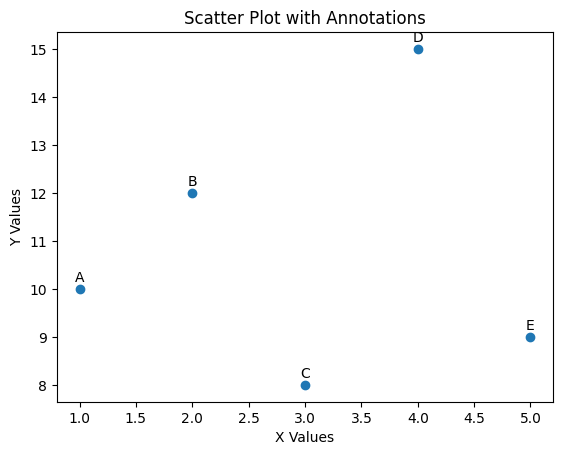

In [26]:
import matplotlib.pyplot as plt

# Sample data
x_values = [1, 2, 3, 4, 5]
y_values = [10, 12, 8, 15, 9]
labels = ['A', 'B', 'C', 'D', 'E']

# Create the scatter plot
plt.scatter(x_values, y_values)

# Add annotations to each point
for i, label in enumerate(labels):
    plt.annotate(label, (x_values[i], y_values[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatter Plot with Annotations')
plt.show()
